# <u>Home Credit Default Risk</u> 

## **Context**

**Situation:**

A bank wants us to predict defaulting loans based on demographical data of their clients.

**Metrics used:**

+ ROC AUC to compare the performance of the models. 
+ Confussion matrix to check if the models were actually predicting defaults or just the majority class (not defaulting) due to the target being imbalanced.

**Models trained:**

Several models were trained and fine-tuned in order to use the one better performing to make the final predictions.

**Results:** 

The demographic characteristics of the users defaulting and not defaulting is extremely similar, which means that maybe other data should be leveraged. Nevertheless, we managed to train a model that is able to correctly predict if a loan is going to default or not in 7 out of 10 cases. 
    

## **Summary**

+ Pre-steps (load libraries, read csv)


+ Count NaN values and drop some columns


+ Categorize object variables


+ Ranking cols by correlation with target and drop some more columns


+ Check collinearity and drop some columns 


+ Visual EDA


+ Ranking by std and correlation with target and drop some columns


+ Drop rows with NaN to create the final df


+ Train/test split


+ Training models (LR, SVM, RF, KNN, XGB) with different hyperparameters


+ Choosing the best performing model to do the prediction


+ Prepare the data to predict and do the predictions


+ Export csv and load to Kaggle


+ Check the ROC AUC Score of the final predictions


# **Pre-steps**

Import libraries and read csv.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None
pd.options.display.max_rows = 100

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("train.csv")
df

,SK_ID_CURR,default,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,150293,0,Cash loans,M,Y,Y,0,202500.0,495000.0,13743.0,495000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.014520,-18128,-1584,-4387.0,-1643,24.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,6,0,1,1,0,1,1,Kindergarten,NaN,0.501166,0.816092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,4.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,102579,0,Cash loans,F,N,N,0,112500.0,490495.5,26014.5,454500.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.002042,-22431,365243,-3076.0,-4919,NaN,1,0,0,1,0,0,NaN,1.0,3,3,TUESDAY,10,0,0,0,0,0,0,XNA,NaN,0.617986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-860.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,106708,0,Cash loans,M,N,Y,0,180000.0,450000.0,20979.0,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.011657,-12435,-1648,-11419.0,-4257,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,THURSDAY,11,1,1,0,1,1,0,Telecom,0.381200,0.755620,0.678568,0.0619,0.0593,0.9841,0.7824,0.0085,0.00,0.1379,0.1667,NaN,0.0127,0.0504,0.0599,0.0000,0.0000,0.0630,0.0615,0.9841,0.7909,0.0085,0.0000,0.1379,0.1667,NaN,0.0129,0.0551,0.0624,0.0000,0.0000,0.0625,0.0593,0.9841,0.7853,0.0085,0.00,0.1379,0.1667,NaN,0.0129,0.0513,0.0610,0.0000,0.0000,reg oper account,block of flats,0.0517,Panel,No,0.0,0.0,0.0,0.0,-1505.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,2.0,1.0
3,359769,0,Cash loans,F,N,Y,1,202500.0,636138.0,2349

# **Count NaN values and drop columns**

## Count the missing values per column

In [4]:
#Number of missing values per feature

null_vals = df.isnull().sum().sort_values(ascending=False).head(60)
null_vals

COMMONAREA_AVG                  6209
COMMONAREA_MODE                 6209
COMMONAREA_MEDI                 6209
NONLIVINGAPARTMENTS_MODE        6172
NONLIVINGAPARTMENTS_MEDI        6172
NONLIVINGAPARTMENTS_AVG         6172
FONDKAPREMONT_MODE              6097
LIVINGAPARTMENTS_MEDI           6076
LIVINGAPARTMENTS_MODE           6076
LIVINGAPARTMENTS_AVG            6076
FLOORSMIN_AVG                   6050
FLOORSMIN_MEDI                  6050
FLOORSMIN_MODE                  6050
OWN_CAR_AGE                     5937
YEARS_BUILD_MEDI                5918
YEARS_BUILD_AVG                 5918
YEARS_BUILD_MODE                5918
LANDAREA_AVG                    5232
LANDAREA_MODE                   5232
LANDAREA_MEDI                   5232
BASEMENTAREA_MEDI               5157
BASEMENTAREA_AVG                5157
BASEMENTAREA_MODE               5157
EXT_SOURCE_1                    5072
NONLIVINGAREA_MEDI              4851
NONLIVINGAREA_AVG               4851
NONLIVINGAREA_MODE              4851
E

## Drop columns with more than 15% of missing values

In [5]:
#Droping columns with more than 15% missing values

df2 = df.dropna(thresh=df.shape[0]*0.86,how='all',axis=1)

## Check again missing values per feature to assert that now only a few rows have missing values. 

df = 122 cols 

df2 = 65 cols 

We passed from 122 to 65 cols.

In [6]:
#Checking again for NaN values

df2.isnull().sum().sort_values(ascending=False).head(10)

NAME_TYPE_SUITE             39
DEF_60_CNT_SOCIAL_CIRCLE    34
OBS_60_CNT_SOCIAL_CIRCLE    34
DEF_30_CNT_SOCIAL_CIRCLE    34
OBS_30_CNT_SOCIAL_CIRCLE    34
EXT_SOURCE_2                15
AMT_GOODS_PRICE             12
FLAG_DOCUMENT_21             0
DAYS_EMPLOYED                0
DAYS_ID_PUBLISH              0
dtype: int64

# **Categorize object variables**

## Check for the type of the cols

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 65 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   9000 non-null   int64  
 1   default                      9000 non-null   int64  
 2   NAME_CONTRACT_TYPE           9000 non-null   object 
 3   CODE_GENDER                  9000 non-null   object 
 4   FLAG_OWN_CAR                 9000 non-null   object 
 5   FLAG_OWN_REALTY              9000 non-null   object 
 6   CNT_CHILDREN                 9000 non-null   int64  
 7   AMT_INCOME_TOTAL             9000 non-null   float64
 8   AMT_CREDIT                   9000 non-null   float64
 9   AMT_ANNUITY                  9000 non-null   float64
 10  AMT_GOODS_PRICE              8988 non-null   float64
 11  NAME_TYPE_SUITE              8961 non-null   object 
 12  NAME_INCOME_TYPE             9000 non-null   object 
 13  NAME_EDUCATION_TYP

In [8]:
# Check for the distribution of the target variable 

df2.default.value_counts(normalize=True)

0    0.923667
1    0.076333
Name: default, dtype: float64

## Create a list with the object type columns

In [9]:
object_cols = (df2.select_dtypes(include=['object']).columns).to_list()
object_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

## Check for the different values of the object type cols

In [10]:
df2.NAME_CONTRACT_TYPE.value_counts()

Cash loans         8142
Revolving loans     858
Name: NAME_CONTRACT_TYPE, dtype: int64

In [11]:
df2.CODE_GENDER.value_counts()

F    5933
M    3067
Name: CODE_GENDER, dtype: int64

In [12]:
df2.FLAG_OWN_CAR.value_counts()

N    5937
Y    3063
Name: FLAG_OWN_CAR, dtype: int64

In [13]:
df2.FLAG_OWN_REALTY.value_counts()

Y    6293
N    2707
Name: FLAG_OWN_REALTY, dtype: int64

In [14]:
df2.NAME_TYPE_SUITE.value_counts()

Unaccompanied      7283
Family             1182
Spouse, partner     342
Children             84
Other_B              45
Other_A              22
Group of people       3
Name: NAME_TYPE_SUITE, dtype: int64

In [15]:
df2.NAME_INCOME_TYPE.value_counts()

Working                 4685
Commercial associate    2076
Pensioner               1643
State servant            595
Unemployed                 1
Name: NAME_INCOME_TYPE, dtype: int64

In [16]:
df2.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    6396
Higher education                 2192
Incomplete higher                 298
Lower secondary                   112
Academic degree                     2
Name: NAME_EDUCATION_TYPE, dtype: int64

In [17]:
df2.NAME_FAMILY_STATUS.value_counts()

Married                 5700
Single / not married    1387
Civil marriage           871
Separated                581
Widow                    461
Name: NAME_FAMILY_STATUS, dtype: int64

In [18]:
df2.NAME_HOUSING_TYPE.value_counts()

House / apartment      8005
With parents            405
Municipal apartment     347
Rented apartment        138
Office apartment         70
Co-op apartment          35
Name: NAME_HOUSING_TYPE, dtype: int64

In [19]:
df2.WEEKDAY_APPR_PROCESS_START.value_counts()

TUESDAY      1609
WEDNESDAY    1558
MONDAY       1459
FRIDAY       1453
THURSDAY     1434
SATURDAY     1026
SUNDAY        461
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [20]:
df2.ORGANIZATION_TYPE.value_counts().head(30)

Business Entity Type 3    1981
XNA                       1644
Self-employed             1106
Other                      514
Medicine                   337
Government                 321
Business Entity Type 2     313
School                     240
Trade: type 7              229
Kindergarten               208
Business Entity Type 1     178
Construction               175
Transport: type 4          148
Trade: type 3              108
Industry: type 9           103
Bank                        88
Security                    86
Industry: type 3            84
Industry: type 11           83
Police                      76
Housing                     74
Agriculture                 72
Transport: type 2           68
Military                    68
Postal                      63
Security Ministries         57
Trade: type 2               54
Restaurant                  53
University                  46
Services                    45
Name: ORGANIZATION_TYPE, dtype: int64

## Create another list with the object type colums with only 2 different values and transform them into 0 or 1

After the categorization these cols will have type int8

In [21]:
object_cols2 = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY']
for elem in object_cols2:
    df2[elem] = df2[elem].astype('category').cat.codes

## Create yet another list with the remaining object type columns

In [22]:
object_cols3 = (df2.select_dtypes(include=['object']).columns).to_list()
object_cols3

['NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

## Transform the rest of categorical features into numerical values 
This transformation has been done with some sense, for example, the weekdays have been ordered.

### Transform all except 'ORGANIZATION_TYPE' col because it holds more than 60 different values

In [23]:
df2['NAME_TYPE_SUITE'] = df2['NAME_TYPE_SUITE'].map({"Unaccompanied": 0, "Spouse, partner": 1, "Family": 2,
                                        "Children": 3, "Group of people": 4, "Other_A": 5,"Other_B": 6})
df2['NAME_INCOME_TYPE'] = df2['NAME_INCOME_TYPE'].map({"Unemployed": 0, "Working": 1, "Commercial associate": 2, 
                                     "State servant": 3, "Pensioner": 4})
df2['NAME_EDUCATION_TYPE'] = df2['NAME_EDUCATION_TYPE'].map({"Lower secondary": 0, "Secondary / secondary special": 1,
                                        "Incomplete higher": 2, "Higher education": 3, "Academic degree": 4})
df2['NAME_FAMILY_STATUS'] = df2['NAME_FAMILY_STATUS'].map({"Single / not married": 0, "Separated": 1, "Widow": 2,
                                      "Civil marriage": 3, "Married": 4})
df2['NAME_HOUSING_TYPE'] = df2['NAME_HOUSING_TYPE'].map({"With parents": 0, "House / apartment": 1, "Municipal apartment": 2, 
                                      "Rented apartment": 3, "Office apartment": 4,"Co-op apartment":5})
df2['WEEKDAY_APPR_PROCESS_START'] = df2['WEEKDAY_APPR_PROCESS_START'].map({"SUNDAY": 0, "MONDAY": 1,
                                        "TUESDAY": 2, "WEDNESDAY": 3, "THURSDAY": 4, "FRIDAY": 5, "SATURDAY": 6})

### Create a function to transform the values of the last object column into numbers

The values with similar name (e.g. all starting with 'Business Entity Type something') have been grouped together and the rest have been put in an 'other' group. 

Only the goups conatining more than 500 values or the ones that could be clearly grouped together were chosen as unique categories, the rest were put in the 'other' group (num 6).

In [24]:
def parse_values(x):
    if x.startswith('Self-employed'):
       return 0
    elif x.startswith('Business'):
       return 1
    elif x.startswith('XNA'):
       return 2
    elif x.startswith('Trade'):
       return 3
    elif x.startswith('Transport'):
       return 4
    elif x.startswith('Industry'):
       return 5
    else:
       return 6

df2['ORGANIZATION_TYPE'] = df2['ORGANIZATION_TYPE'].apply(parse_values)

In [25]:
df2.ORGANIZATION_TYPE.value_counts()

6    2701
1    2472
2    1644
0    1106
3     417
5     409
4     251
Name: ORGANIZATION_TYPE, dtype: int64

# **Rank variables by correlation with target and drop some columns**



## It's always good to inspect the current df we are working with

In [26]:
df2.shape

(9000, 65)

In [27]:
df2.describe()

,SK_ID_CURR,default,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.00000,9.000000e+03,9.000000e+03,9000.000000,8.988000e+03,8961.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.0,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,8985.000000,8966.000000,8966.000000,8966.000000,8966.000000,9000.000000,9000.000000,9000.000000,9000.0,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.0,9000.000000,9000.0,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,277814.695000,0.076333,0.095333,0.340778,0.340333,0.699222,0.41000,1.688376e+05,6.067322e+05,27359.101000,5.454415e+05,0.373842,1.910444,1.508444,2.990667,1.063111,0.021040,-16072.643889,64726.021889,-5000.149556,-2982.200667,1.0,0.817333,0.198444,0.998000,0.286222,0.056000,2.140111,2.043222,2.022444,3.167556,12.038111,0.013222,0.047444,0.038222,0.075444,0.220222,0.173333,2.918444,0.516349,1.449699,0.149788,1.431296,0.105064,-958.061889,0.000111,0.708333,0.0,0.014222,0.089333,0.000444,0.083556,0.004444,0.0,0.003111,0.0,0.003444,0.002667,0.001778,0.010111,0.000222,0.009667,0.000333,0.000556,0.000444
std,102621.578382,0.265545,0.293691,0.473997,0.473848,0.458622,0.72431,9.456199e+04,4.086085e+05,14677.391325,3.753760e+05,0.870629,1.144316,0.873697,1.526417,0.522646,0.013770,4359.261531,142093.159342,3536.195810,1525.181505,0.0,0.386414,0.398851,0.044679,0.452020,0.229935,0.919370,0.502487,0.497071,1.758295,3.241201,0.114232,0.212599,0.191743,0.264122,0.414419,0.378556,2.300421,0.189921,2.327814,0.454737,2.308479,0.372362,818.585461,0.010541,0.454555,0.0,0.118412,0.285240,0.021078,0.276735,0.066522,0.0,0.055694,0.0,0.058591,0.051574,0.042129,0.100050,0.014906,0.097848,0.018255,0.023565,0.021078
min,100036.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.700000e+04,4.500000e+04,3384.000000,4.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000938,-25186.000000,-16113.000000,-24672.000000,-6219.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000194,0.000000,0.000000,0.000000,0.000000,-4131.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188596.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.125000e+05,2.730240e+05,16798.500000,2.385000e+05,0.000000,1.000000,1.000000,2.000000,1.000000,0.010032,-19704.000000,-2802.500000,-7475.000000,-4304.250000,1.0,1.000000,0.

## Rank features by correlation with the target

In [28]:
df2[df2.columns[1:]].corr()['default'].sort_values(ascending=False)

default                        1.000000
DAYS_BIRTH                     0.071242
REGION_RATING_CLIENT_W_CITY    0.070365
REGION_RATING_CLIENT           0.066047
CODE_GENDER                    0.062582
REG_CITY_NOT_WORK_CITY         0.061301
DAYS_ID_PUBLISH                0.057660
DAYS_LAST_PHONE_CHANGE         0.057183
DAYS_REGISTRATION              0.056337
REG_CITY_NOT_LIVE_CITY         0.052554
FLAG_EMP_PHONE                 0.046017
LIVE_CITY_NOT_WORK_CITY        0.044129
FLAG_DOCUMENT_3                0.042694
DEF_60_CNT_SOCIAL_CIRCLE       0.037104
FLAG_DOCUMENT_21               0.033645
DEF_30_CNT_SOCIAL_CIRCLE       0.028832
FLAG_WORK_PHONE                0.018538
FLAG_EMAIL                     0.017341
CNT_CHILDREN                   0.013479
REG_REGION_NOT_LIVE_REGION     0.010684
FLAG_DOCUMENT_8                0.008464
CNT_FAM_MEMBERS                0.007166
OBS_30_CNT_SOCIAL_CIRCLE       0.005860
OBS_60_CNT_SOCIAL_CIRCLE       0.005840
FLAG_CONT_MOBILE               0.003503


## Create a list with the features less correlated to the target (less than 0.0 abs correlation) and the ones with a NaN correlation

In [29]:
#Columns with less than 0,0 absolute correlation with target 

low_corr = df2.loc[:, (abs(df2.corr()['default']) < 0.01)]

low_corr.columns

Index(['SK_ID_CURR', 'FLAG_OWN_CAR', 'AMT_ANNUITY', 'NAME_TYPE_SUITE',
       'NAME_HOUSING_TYPE', 'FLAG_CONT_MOBILE', 'CNT_FAM_MEMBERS',
       'WEEKDAY_APPR_PROCESS_START', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20'],
      dtype='object')

In [30]:
#columns with NaN correlation with target 

nan_corr = df2[['FLAG_MOBIL', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_12']]

## Drop those cols from the df

df = 122 cols

df2 = 65 cols

df3 = 46 cols

df4 = 42 cols

In [31]:
#Drop columns with less than 0,0 absolute correlation with target or NaN correlation

df3 = df2.drop(columns=low_corr.columns)
df3.shape

(9000, 46)

In [32]:
df4 = df3.drop(columns=nan_corr.columns)
df4.shape

(9000, 42)

# **Check for collinearity and drop some more cols**

## Write some functions to check and print the collinearity between cols

In [33]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df4, 9))

Top Absolute Correlations
DAYS_EMPLOYED               FLAG_EMP_PHONE                 0.999885
AMT_CREDIT                  AMT_GOODS_PRICE                0.987493
REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY    0.946868
REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.868716
DEF_30_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE       0.862902
NAME_INCOME_TYPE            FLAG_EMP_PHONE                 0.862296
                            DAYS_EMPLOYED                  0.861791
REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY        0.827650
DAYS_BIRTH                  FLAG_EMP_PHONE                 0.610550
dtype: float64


## Check which of the highly correlated cols is less correlated to the target

In [34]:
print('DAYS_EMPLOYED \t', df3.corr()['default']['DAYS_EMPLOYED'])
print('FLAG_EMP_PHONE \t',df3.corr()['default']['FLAG_EMP_PHONE'])
print('AMT_CREDIT \t \t',df3.corr()['default']['AMT_CREDIT'])
print('AMT_GOODS_PRICE \t',df3.corr()['default']['AMT_GOODS_PRICE'])
print('REGION_RATING_CLIENT \t \t' ,df3.corr()['default']['REGION_RATING_CLIENT'])
print('REGION_RATING_CLIENT_W_CITY \t',df3.corr()['default']['REGION_RATING_CLIENT_W_CITY'])
print('REG_REGION_NOT_WORK_REGION \t' ,df3.corr()['default']['REG_REGION_NOT_WORK_REGION'])
print('LIVE_REGION_NOT_WORK_REGION \t',df3.corr()['default']['LIVE_REGION_NOT_WORK_REGION'])
print('DEF_30_CNT_SOCIAL_CIRCLE \t' ,df3.corr()['default']['DEF_30_CNT_SOCIAL_CIRCLE'])
print('DEF_60_CNT_SOCIAL_CIRCLE \t',df3.corr()['default']['DEF_60_CNT_SOCIAL_CIRCLE'])
print('NAME_INCOME_TYPE \t' ,df3.corr()['default']['NAME_INCOME_TYPE'])
print('DAYS_EMPLOYED \t \t',df3.corr()['default']['DAYS_EMPLOYED'])
print('REG_CITY_NOT_WORK_CITY \t \t' ,df3.corr()['default']['REG_CITY_NOT_WORK_CITY'])
print('LIVE_CITY_NOT_WORK_CITY \t' ,df3.corr()['default']['LIVE_CITY_NOT_WORK_CITY'])

DAYS_EMPLOYED 	 -0.044971603072508054
FLAG_EMP_PHONE 	 0.04601724946975175
AMT_CREDIT 	 	 -0.023638087660355994
AMT_GOODS_PRICE 	 -0.032584460457109166
REGION_RATING_CLIENT 	 	 0.06604651005265376
REGION_RATING_CLIENT_W_CITY 	 0.07036465436156071
REG_REGION_NOT_WORK_REGION 	 -0.022821841421085114
LIVE_REGION_NOT_WORK_REGION 	 -0.0267541182036138
DEF_30_CNT_SOCIAL_CIRCLE 	 0.02883183878244621
DEF_60_CNT_SOCIAL_CIRCLE 	 0.037104400171368956
NAME_INCOME_TYPE 	 -0.06417074107904895
DAYS_EMPLOYED 	 	 -0.044971603072508054
REG_CITY_NOT_WORK_CITY 	 	 0.06130104808409391
LIVE_CITY_NOT_WORK_CITY 	 0.04412929774504746


## Drop the col less correlated to the target out of each pair of correlated cols

df = 122 cols

df2 = 65 cols

df3 = 46 cols

df4 = 42 cols

df5 = 35 cols

In [35]:
df5 = df4.drop(columns=['DAYS_EMPLOYED', 'FLAG_EMP_PHONE','AMT_GOODS_PRICE','REGION_RATING_CLIENT',
                        'REG_REGION_NOT_WORK_REGION','DEF_30_CNT_SOCIAL_CIRCLE','LIVE_CITY_NOT_WORK_CITY'])
df5.shape

(9000, 35)

## Check again for collinearity to make sure we removed all the highly correlated ones

In [36]:
print(get_top_abs_correlations(df5, 9))

NAME_INCOME_TYPE            DAYS_BIRTH                     0.530073
REGION_POPULATION_RELATIVE  REGION_RATING_CLIENT_W_CITY    0.525424
NAME_INCOME_TYPE            FLAG_DOCUMENT_6                0.506586
FLAG_DOCUMENT_3             FLAG_DOCUMENT_6                0.488093
NAME_CONTRACT_TYPE          FLAG_DOCUMENT_3                0.480083
REG_CITY_NOT_LIVE_CITY      REG_CITY_NOT_WORK_CITY         0.430931
DAYS_BIRTH                  FLAG_DOCUMENT_6                0.406133
AMT_INCOME_TOTAL            AMT_CREDIT                     0.391287
CNT_CHILDREN                DAYS_BIRTH                     0.328939
dtype: float64


# **Visual EDA**

## Plot the variables to see the distribution

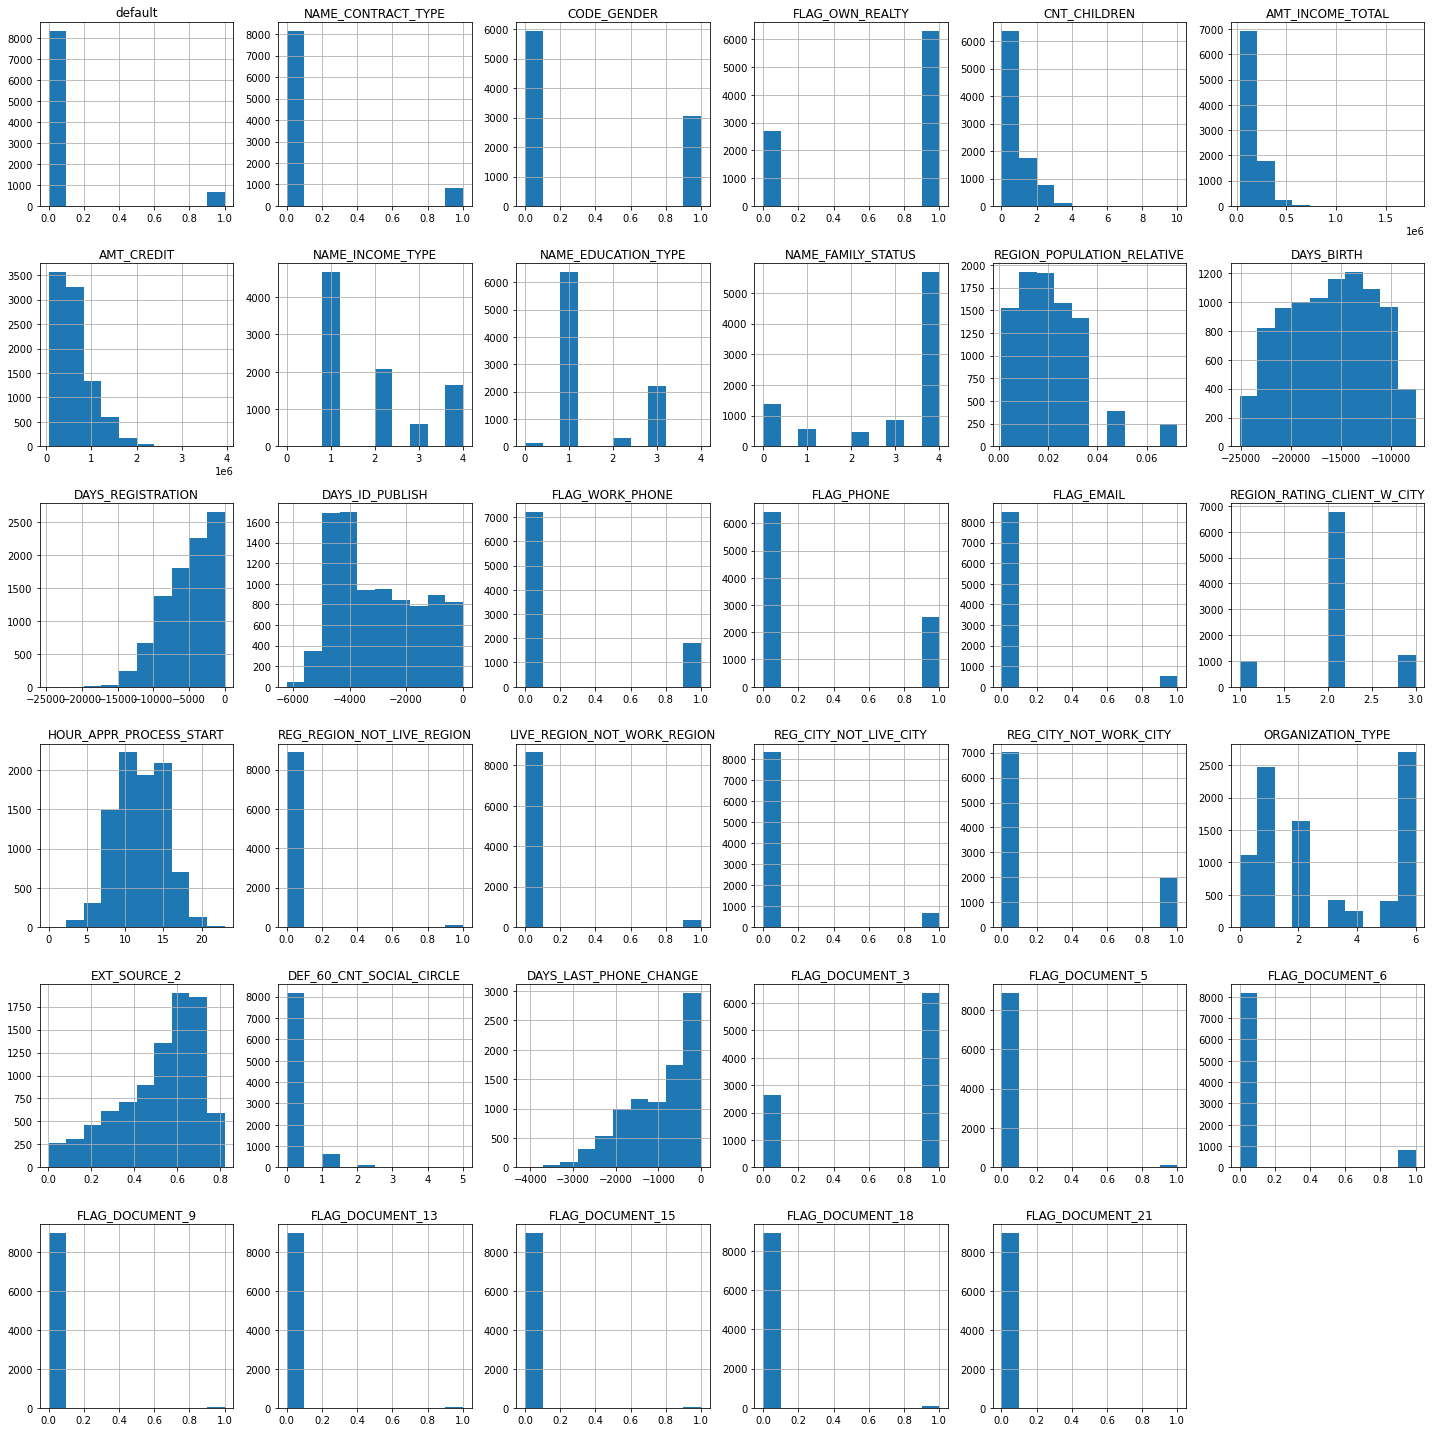

In [37]:
#Plot variables

fig, ax = plt.subplots(figsize=(20, 20))
ax_ = df5.hist(ax=ax)
plt.tight_layout()

## Plot some boxplots to visually check if the default group has different characteristics than the group not defaulting 

Here we actually discover that the group defaulting has slightly different results for some variables such as AMT_INCOME_TOTAL, AMT_CREDIT, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, DAYS_BIRTH, DAYS_REGISTRATION, DAYS_ID_PUBLSH, FLAG_PHONE, REG_CITY_NOT_WORK_CITY, EXT_SOURCE_2, DAYS_LAST_PHONE_CHANGE and FLAG_DOCUMENT_3.

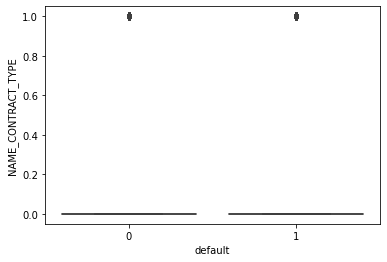

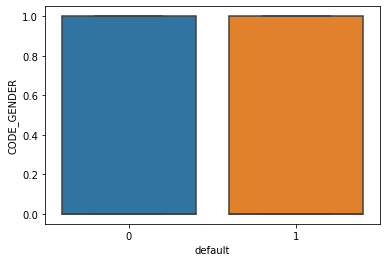

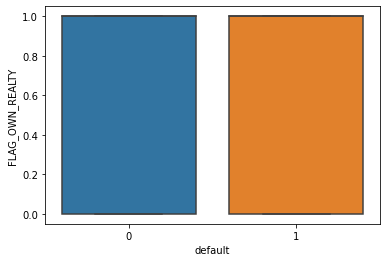

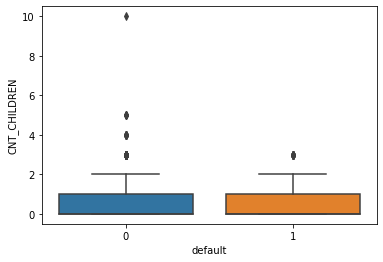

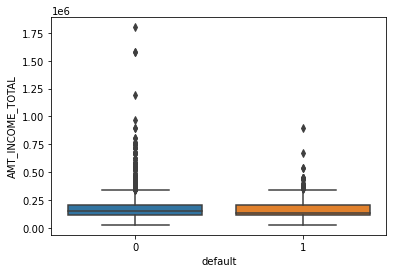

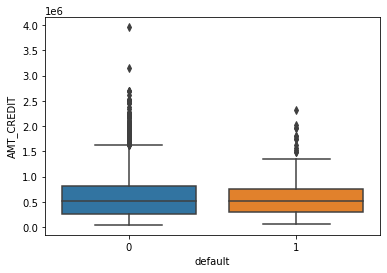

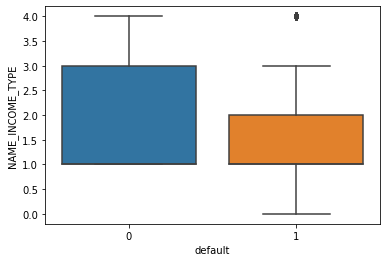

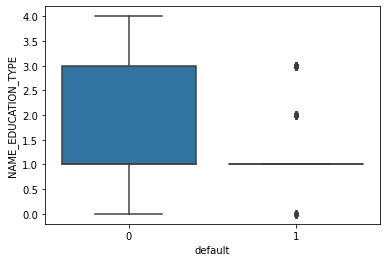

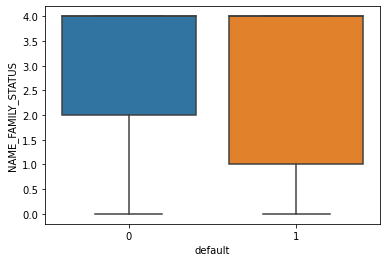

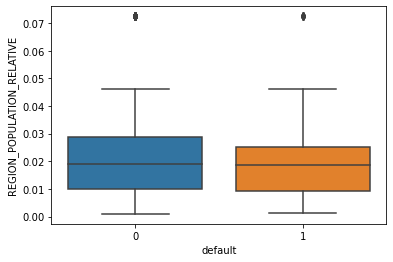

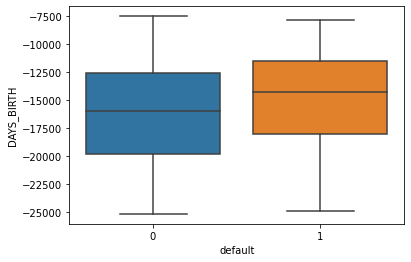

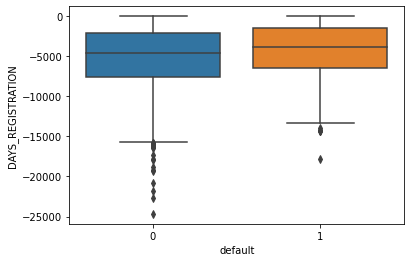

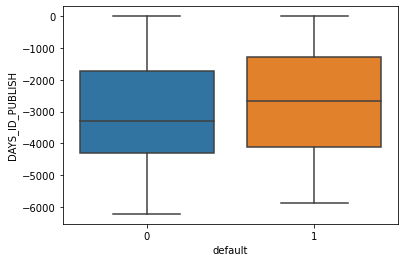

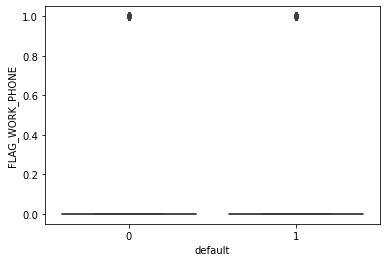

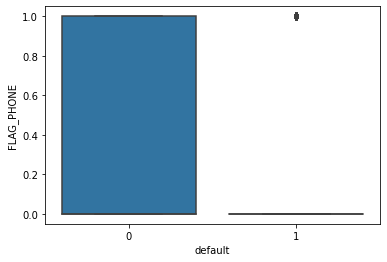

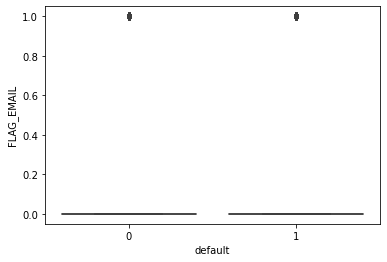

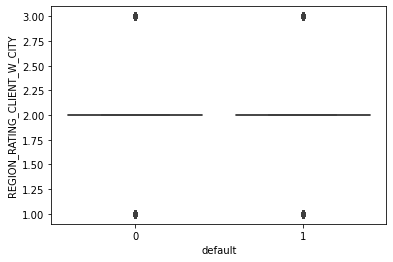

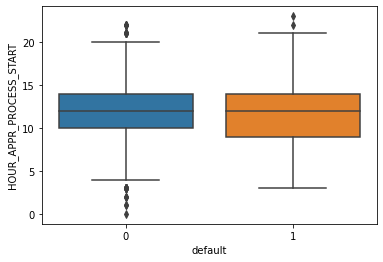

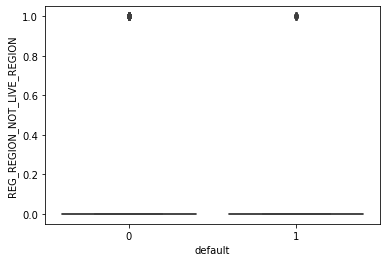

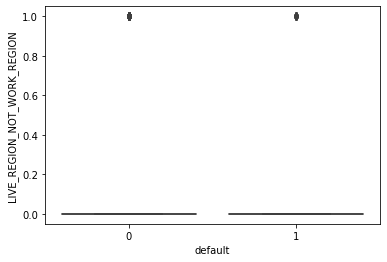

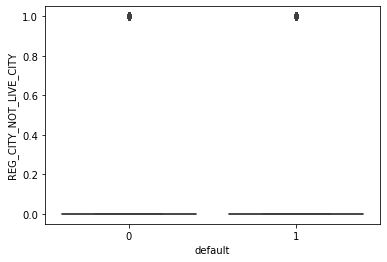

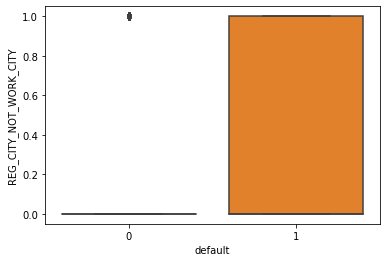

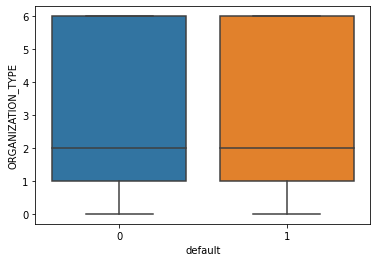

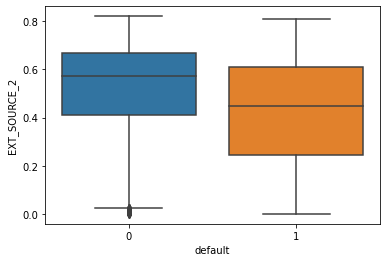

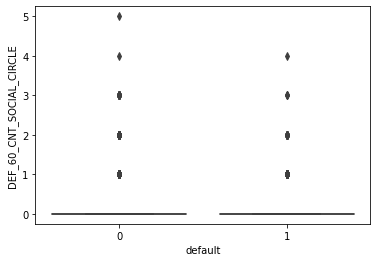

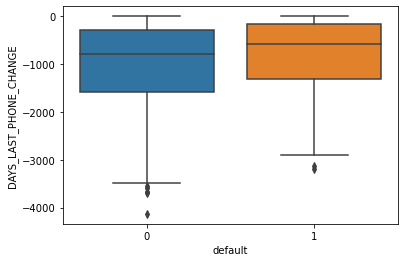

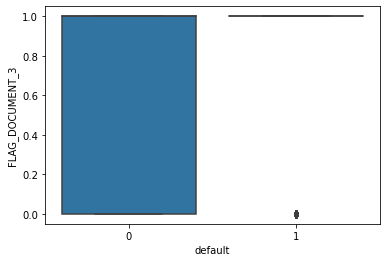

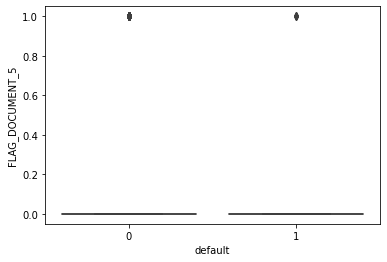

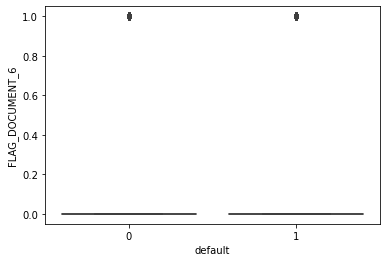

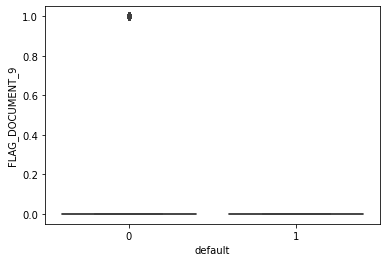

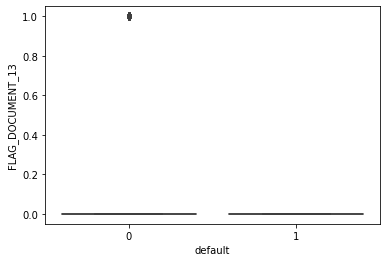

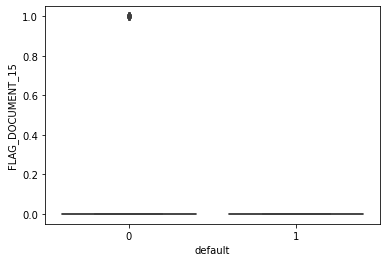

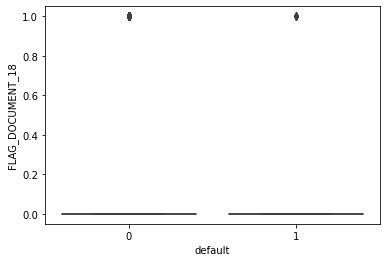

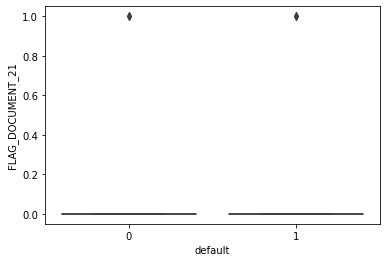

In [38]:
data1 = df5.loc[:, df5.columns != 'default']
columnas = list(data1.columns)
for elem in columnas:
    sns.boxplot(x='default',y=elem, data=df5)
    plt.show()

# **Rank variables by std and correlation to target**

In [39]:
#Summary

df5.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,default,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_9,FLAG_DOCUMENT_13,FLAG_DOCUMENT_15,FLAG_DOCUMENT_18,FLAG_DOCUMENT_21
count,9000.000,9000.000,9000.000,9000.000,9000.000,9000.000,9000.000,9000.000,9000.000,9000.000,9000.000,9000.000,9000.000,9000.000,9000.000,9000.000,9000.000,9000.000,9000.000,9000.000,9000.000,9000.000,9000.000,9000.000,8985.000,8966.000,9000.000,9000.000,9000.000,9000.000,9000.000,9000.000,9000.000,9000.000,9000.000
mean,0.076,0.095,0.341,0.699,0.410,168837.645,606732.196,1.910,1.508,2.991,0.021,-16072.644,-5000.150,-2982.201,0.198,0.286,0.056,2.022,12.038,0.013,0.038,0.075,0.220,2.918,0.516,0.105,-958.062,0.708,0.014,0.089,0.004,0.003,0.002,0.010,0.000
std,0.266,0.294,0.474,0.459,0.724,94561.989,408608.549,1.144,0.874,1.526,0.014,4359.262,3536.196,1525.182,0.399,0.452,0.230,0.497,3.241,0.114,0.192,0.264,0.414,2.300,0.190,0.372,818.585,0.455,0.118,0.285,0.067,0.059,0.042,0.098,0.021
min,0.000,0.000,0.000,0.000,0.000,27000.000,45000.000,0.000,0.000,0.000,0.001,-25186.000,-24672.000,-6219.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-4131.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,112500.000,273024.000,1.000,1.000,2.000,0.010,-19704.000,-7475.000,-4304.250,0.000,0.000,0.000,2.000,10.000,0.000,0.000,0.000,0.000,1.000,0.397,0.000,-1562.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,0.000,0.000,1.000,0.000,148500.000,521280.000,1.000,1.000,4.000,0.019,-15852.500,-4531.500,-3251.000,0.000,0.000,0.000,2.000,12.000,0.000,0.000,0.000,0.000,2.000,0.568,0.000,-763.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.000,0.000,1.000,1.000,1.000,202500.000,810000.000,2.000,2.000,4.000,0.029,-12451.750,-2025.750,-1674.750,0.000,1.000,0.000,2.000,14.000,0.000,0.000,0.000,0.000,6.000,0.664,0.000,-269.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,1.000,1.000,1.000,1.000,10.000,1800000.000,3956274.000,4.000,4.000,4.000,0.073,-7489.000,0.000,-1.000,1.000,1.000,1.000,3.000,23.000,1.000,1.000,1.000,1.000,6.000,0.821,5.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


## Rank cols by std and save if as a df

First we have to normalize the cols and then compute the std. 

Since we have some missing values in the data, we will impute the mean of each column to be able to normalize the data and then rank the cols by std.

In [40]:
df5.isnull().sum().sort_values(ascending=False).head(10)

DEF_60_CNT_SOCIAL_CIRCLE      34
EXT_SOURCE_2                  15
FLAG_PHONE                     0
DAYS_ID_PUBLISH                0
DAYS_REGISTRATION              0
DAYS_BIRTH                     0
REGION_POPULATION_RELATIVE     0
NAME_FAMILY_STATUS             0
NAME_EDUCATION_TYPE            0
FLAG_DOCUMENT_21               0
dtype: int64

In [41]:
df5_2 = df5.fillna(df5.mean())

In [42]:
from sklearn import preprocessing

d = preprocessing.normalize(df5_2)
scaled_df = pd.DataFrame(d, columns=df5_2.columns)
scaled_df.head()

df_std = scaled_df.std().sort_values(ascending=False).to_frame('std')*100

## Rank cols by corr to target and save it as df

In [43]:
df_corr = df5.corr()['default'].sort_values(ascending=False).to_frame('corr')

## Join the second df to the first  to check if the features with low std are also lowly correlated to the target

Spoiler alert: they are!

In [44]:
df_std_corr = df_std.merge(df_corr, left_index=True, right_index=True)
df_std_corr

,std,corr
AMT_INCOME_TOTAL,18.374970,-0.017140
AMT_CREDIT,10.119375,-0.023638
DAYS_BIRTH,3.078176,0.071242
DAYS_REGISTRATION,1.336813,0.056337
DAYS_ID_PUBLISH,0.668085,0.057660
DAYS_LAST_PHONE_CHANGE,0.270455,0.057183
HOUR_APPR_PROCESS_START,0.002110,-0.024425
ORGANIZATION_TYPE,0.000804,-0.026918
NAME_FAMILY_STATUS,0.000620,-0.023190
NAME_INCOME_TYPE,0.000511,-0.064171


## Drop the columns with low std and low correlation to target 

All under 0,1 std except for 'default' and other features of interest. 

These features of interest are the ones that in the boxplots seemed to have different characteristics for defaulting and not deafulting groups.

df = 122 cols

df2 = 65 cols

df3 = 46 cols

df4 = 42 cols

df5 = 35 cols

df6 = 22 cols

In [45]:
low_std_cols = df5.loc[:, (scaled_df.std() < 0.000002)]
low_std_cols = low_std_cols.loc[:, low_std_cols.columns != 'default']
low_std_cols = low_std_cols.loc[:, low_std_cols.columns != 'FLAG_PHONE']
low_std_cols = low_std_cols.loc[:, low_std_cols.columns != 'REG_CITY_NOT_WORK_CITY']
low_std_cols = low_std_cols.loc[:, low_std_cols.columns != 'EXT_SOURCE_2']
low_std_cols = low_std_cols.loc[:, low_std_cols.columns != 'FLAG_DOCUMENT_3']
low_std_cols = low_std_cols.loc[:, low_std_cols.columns != 'REGION_RATING_CLIENT_W_CITY']
low_std_cols = low_std_cols.loc[:, low_std_cols.columns != 'REG_CITY_NOT_LIVE_CITY']
low_std_cols = low_std_cols.loc[:, low_std_cols.columns != 'CNT_CHILDREN']
low_std_cols = low_std_cols.loc[:, low_std_cols.columns != 'FLAG_OWN_REALTY']
low_std_cols = low_std_cols.loc[:, low_std_cols.columns != 'REGION_POPULATION_RELATIVE']
low_std_cols = low_std_cols.loc[:, low_std_cols.columns != 'CODE_GENDER']
df6 = df5.drop(columns=low_std_cols.columns)
df6.shape

(9000, 22)

# **Final touches to the df**

## Check which are the cols that made it to the final!

In [46]:
cols4 = df6.columns.to_list()
cols4

['default',
 'CODE_GENDER',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_PHONE',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_3']

## Check which of the cols in the final dataframe were objects in the begining and if there is something going on with them (not well transformed into numbers, maybe)

6 out of 22 were objects in the begining. 

Everything seems to be ok.

In [47]:
list(set(object_cols).intersection(cols4))

['NAME_INCOME_TYPE',
 'ORGANIZATION_TYPE',
 'FLAG_OWN_REALTY',
 'NAME_EDUCATION_TYPE',
 'CODE_GENDER',
 'NAME_FAMILY_STATUS']

In [48]:
df6.head()

,default,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_PHONE,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3
0,0,1,1,0,202500.0,495000.0,1,1,4,0.014520,-18128,-4387.0,-1643,0,2,6,0,1,6,0.501166,0.0,1
1,0,0,0,0,112500.0,490495.5,4,1,2,0.002042,-22431,-3076.0,-4919,0,3,10,0,0,2,0.617986,-860.0,0
2,0,1,1,0,180000.0,450000.0,1,3,4,0.011657,-12435,-11419.0,-4257,1,1,11,1,1,6,0.755620,-1505.0,1
3,0,0,1,1,202500.0,636138.0,1,1,4,0.018850,-18454,-8648.0,-2009,0,2,9,0,0,1,0.445139,-65.0,1
4,0,0,1,0,49500.0,270000.0,4,1,4,0.020246,-20941,-7155.0,-3816,0,3,10,0,0,2,0.727265,-350.0,0


## Check if some of the final cols have some missing values

There are only 15 missing values in the EXT_SOURCE_2 col out of 1000 rows, so we can just remove those rows.

In [49]:
df6.isnull().sum().sort_values(ascending=False)

EXT_SOURCE_2                   15
FLAG_DOCUMENT_3                 0
REGION_POPULATION_RELATIVE      0
CODE_GENDER                     0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
DAYS_BIRTH                      0
DAYS_LAST_PHONE_CHANGE          0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_PHONE                      0
REGION_RATING_CLIENT_W_CITY     0
HOUR_APPR_PROCESS_START         0
REG_CITY_NOT_LIVE_CITY          0
REG_CITY_NOT_WORK_CITY          0
ORGANIZATION_TYPE               0
default                         0
dtype: int64

### Check if the 15 missing of EXT_SOURCE_2 were defaulting

Since our data is imabalanced and we don't want to loose rows with clients defaulting, we will impute the missing value for the two rows defaulting.

In [50]:
df6[df6.EXT_SOURCE_2.isnull()]


,default,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_PHONE,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3
16,0,1,1,0,135000.0,157500.0,4,1,4,0.019101,-23315,-10191.0,-4251,0,2,10,0,0,2,NaN,-746.0,0
408,0,0,1,0,63000.0,808650.0,1,1,4,0.015221,-18316,-9914.0,-1856,0,2,10,0,0,6,NaN,-1471.0,1
1188,0,0,1,0,90000.0,343377.0,2,1,4,0.025164,-15669,-3872.0,-3920,0,2,8,0,0,6,NaN,-821.0,1
1341,0,0,1,0,157500.0,720000.0,2,1,3,0.026392,-14737,-8639.0,-93,0,2,14,0,0,6,NaN,-316.0,1
1446,0,0,1,3,81000.0,103500.0,1,1,4,0.028663,-14071,-1576.0,-4742,0,2,8,0,0,3,NaN,-358.0,1
2548,0,0,1,0,40500.0,66222.0,4,1,1,0.018801,-21451,-180.0,-4384,0,2,6,0,0,2,NaN,0.0,0
3017,0,0,1,0,157500.0,450000.0,1,1,2,0.004960,-22375,-4807.0,-4815,0,2,12,0,0,6,NaN,-719.0,0
5438,1,0,1,0,103500.0,308133.0,1,1,4,0.035792,-15275,-2218.0,-2203,0,2,13,0,1,0,NaN,-212.0,1
5613,0,0,1,0,108000.0,314100.0,4,1,2,0.046220,-21843,-12674.0,-4417,0,1,10,0,0,2,NaN,-547.0,0
5935,1,0,0,1,157500.0,202500.0,1,1,4,0.009657,-14765,-7022.0,-673,0,2,15,0,0,1,NaN,-637.0,0


In [51]:
df6.EXT_SOURCE_2.iloc[[5438]] = df6.EXT_SOURCE_2.mean()
df6.EXT_SOURCE_2.iloc[[5935]] = df6.EXT_SOURCE_2.mean()

In [52]:
#Check that now are 2 NaN values less. There is no row with NaN in EXT_SOURCE_2 and default 1.
df6[df6.EXT_SOURCE_2.isnull()]

,default,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_PHONE,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3
16,0,1,1,0,135000.0,157500.0,4,1,4,0.019101,-23315,-10191.0,-4251,0,2,10,0,0,2,NaN,-746.0,0
408,0,0,1,0,63000.0,808650.0,1,1,4,0.015221,-18316,-9914.0,-1856,0,2,10,0,0,6,NaN,-1471.0,1
1188,0,0,1,0,90000.0,343377.0,2,1,4,0.025164,-15669,-3872.0,-3920,0,2,8,0,0,6,NaN,-821.0,1
1341,0,0,1,0,157500.0,720000.0,2,1,3,0.026392,-14737,-8639.0,-93,0,2,14,0,0,6,NaN,-316.0,1
1446,0,0,1,3,81000.0,103500.0,1,1,4,0.028663,-14071,-1576.0,-4742,0,2,8,0,0,3,NaN,-358.0,1
2548,0,0,1,0,40500.0,66222.0,4,1,1,0.018801,-21451,-180.0,-4384,0,2,6,0,0,2,NaN,0.0,0
3017,0,0,1,0,157500.0,450000.0,1,1,2,0.004960,-22375,-4807.0,-4815,0,2,12,0,0,6,NaN,-719.0,0
5613,0,0,1,0,108000.0,314100.0,4,1,2,0.046220,-21843,-12674.0,-4417,0,1,10,0,0,2,NaN,-547.0,0
6708,0,0,1,0,180000.0,450000.0,1,1,3,0.028663,-19210,-3628.0,-2754,0,2,9,0,0,1,NaN,-259.0,1
6872,0,0,1,0,157500.0,593010.0,1,1,4,0.011703,-13277,-3303.0,-2813,1,2,15,0,1,5,NaN,-1850.0,1


In [53]:
df7 = df6.dropna()
df7.shape

(8987, 22)

# **Train-test split** 

We performed a train-test split of 90%-10% with statification because since the data is imbalanced we want to keep the same distribution in the train and test data.

In [54]:
from sklearn.model_selection import train_test_split

X = df7.loc[:, df7.columns != 'default']
y = df7['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=33, stratify=y)


# **Let's do some modelling**

Some basic models were used to rapidly compute some predictions and choose the one that performs better to try to make it even better by fine-tunning it.

The problem: 
From the bank's perspective, we want to minimize the number of defaulting loans, therefore we are specially interested in predicting the loans that are going to default.

A good metric to check if our models are doing good at predicting the minority class is the ROC AUC score, which also allows us to compare the performace between models. Nevertheless, the confusion matrix is easier to visually interpret. Therefore we decided to use both of them.

## Logistic Regression

ROC AUC score of 0.5 

Predicted 0 defaulting

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_auc_score

lr = LogisticRegression()
lr = lr.fit(X_train, y_train)

# Predictions
y_hat_lr = lr.predict(X_test)

In [56]:
#Create a dict to store the scores of the different models
losses = {}
losses['Logistic lr'] = roc_auc_score(y_test, y_hat_lr)
for key, value in losses.items():
    print(key, ' : ', format(value, '.3f'))

Logistic lr  :  0.500


In [57]:
cm_lr = confusion_matrix(y_test, y_hat_lr)
cm_lr

array([[830,   0],
       [ 69,   0]])

### Multivariate analysis

With the coefficients of logistic regression we can see that the the variation in one unit of any variable does almost not alter the probability of defaulting. 

DAYS_LAST_PHONE_CHANGE is the one that has a 'bigger' effect, increasing it 1 unit increases the probability of deafulting by 0.00029.

In [58]:
coef = pd.DataFrame(lr.coef_[0], columns=['coef'])
cols = pd.DataFrame(X_train.columns, columns=['cols'])
coef_cols = cols.merge(coef, left_index=True, right_index=True)
#coef_cols.coef = coef_cols.coef * 1000
coef_cols

,cols,coef
0,CODE_GENDER,1.808553e-07
1,FLAG_OWN_REALTY,-1.087256e-07
2,CNT_CHILDREN,-2.093800e-07
3,AMT_INCOME_TOTAL,-2.153791e-06
4,AMT_CREDIT,-1.687733e-07
5,NAME_INCOME_TYPE,-2.823605e-07
6,NAME_EDUCATION_TYPE,-7.278852e-07
7,NAME_FAMILY_STATUS,-5.676146e-07
8,REGION_POPULATION_RELATIVE,-7.554760e-09
9,DAYS_BIRTH,7.671179e-05


## SVM linear and polynomial

Both with a ROC AUC score of 0.5 

Both predicted 0 defaulting

In [59]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

clf_poly = svm.SVC(kernel='poly')
clf_poly.fit(X_train, y_train)

y_hat_clf = clf.predict(X_test)
y_hat_clf_poly = clf_poly.predict(X_test)

#Update the dict
losses['SVM (linear) clf'] = roc_auc_score(y_test, clf.predict(X_test))
losses['SVM (polynomial) clf_poly'] = roc_auc_score(y_test, clf_poly.predict(X_test))
for key, value in losses.items():
    print(key, ' : ', format(value, '.3f'))

Logistic lr  :  0.500
SVM (linear) clf  :  0.500
SVM (polynomial) clf_poly  :  0.500


In [60]:
cm_clf = confusion_matrix(y_test, y_hat_clf)
cm_clf

array([[830,   0],
       [ 69,   0]])

In [61]:
cm_clf_poly = confusion_matrix(y_test, y_hat_clf_poly)
cm_clf_poly

array([[830,   0],
       [ 69,   0]])

## Random Forest

ROC AUC score of 0.5 

Predicted 0 defaulting

In [62]:
from sklearn.ensemble import RandomForestClassifier

randfor = RandomForestClassifier(random_state=30)
randfor.fit(X_train, y_train)

y_hat_randfor = randfor.predict(X_test)

#Update the dict
losses['Random Forest randfor'] = roc_auc_score(y_test, randfor.predict(X_test).round())
for key, value in losses.items():
    print(key, ' : ', format(value, '.3f'))

Logistic lr  :  0.500
SVM (linear) clf  :  0.500
SVM (polynomial) clf_poly  :  0.500
Random Forest randfor  :  0.500


In [63]:
cm_randfor = confusion_matrix(y_test, y_hat_randfor)
cm_randfor

array([[830,   0],
       [ 69,   0]])

## KNN with 8 neighbors

The num of neighbors was chosen according to the plot error rate vs k value. 

ROC AUC score of 0.5 

Predicted 0 defaulting

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

y_hat_knn = knn.predict(X_test)

# Update the dict
losses['KNN'] = roc_auc_score(y_test, knn.predict(X_test).round())
for key, value in losses.items():
    print(key, ' : ', format(value, '.3f'))

Logistic lr  :  0.500
SVM (linear) clf  :  0.500
SVM (polynomial) clf_poly  :  0.500
Random Forest randfor  :  0.500
KNN  :  0.500


In [65]:
cm_knn = confusion_matrix(y_test, y_hat_knn)
cm_knn

array([[830,   0],
       [ 69,   0]])

### Plotting the best num of neighbors

Text(0, 0.5, 'Error Rate')

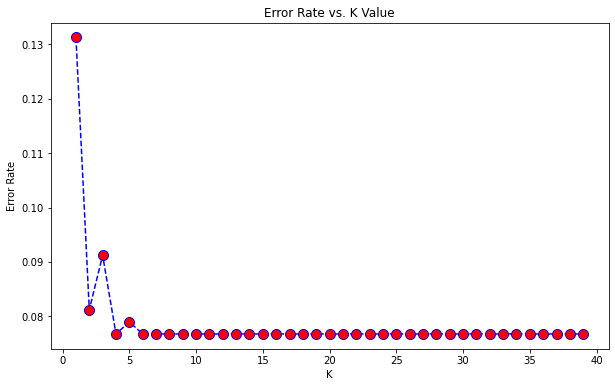

In [66]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## XGBoost

Surprisingly the beloved XGBoost performed worst than the previous models, predicting a false negative. 

ROC AUC score of 0.5

Predicted 0 defaulting

In [67]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_hat_xgb = xgb.predict(X_test)

[00:19:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [68]:
# Update the dict
losses['XGBoost xgb'] = roc_auc_score(y_test, xgb.predict(X_test).round())
for key, value in losses.items():
    print(key, ' : ', format(value, '.3f'))

Logistic lr  :  0.500
SVM (linear) clf  :  0.500
SVM (polynomial) clf_poly  :  0.500
Random Forest randfor  :  0.500
KNN  :  0.500
XGBoost xgb  :  0.519


In [69]:
cm_xgb = confusion_matrix(y_test, y_hat_xgb)
cm_xgb

array([[825,   5],
       [ 66,   3]])

# **Let's do some more modelling**


With hyperparameters and Gridsearch

In [70]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Logistic Regression Balanced with GridSearch

In [71]:
#Creating the grid for gridsearch
param_grid = {}
param_grid['solver'] = ['newton-cg', 'lbfgs', 'liblinear', 'saga', 'sag']
param_grid['penalty'] = ['l2', 'l1', 'elasticnet']
param_grid['C'] = list(range(50, 150, 10))
param_grid['class_weight'] = ['balanced', {0:1,1:10}, {0:1,1:20},{0:1,1:30},{0:1,1:100}]

grid_search_lr = GridSearchCV(LogisticRegression(), param_grid, n_jobs=-1, cv=3, scoring='roc_auc', error_score=0)
grid_result_lr = grid_search_lr.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result_lr.best_score_, grid_result_lr.best_params_))
means = grid_result_lr.cv_results_['mean_test_score']
stds = grid_result_lr.cv_results_['std_test_score']
params = grid_result_lr.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Update the dict    
losses['GridSearch lr' + str(grid_result_lr.best_params_)] = grid_result_lr.best_score_
losses

Best: 0.682447 using {'C': 90, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l1', 'solver': 'liblinear'}
0.681119 (0.020708) with: {'C': 50, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg'}
0.558361 (0.007518) with: {'C': 50, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}
0.665625 (0.026809) with: {'C': 50, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
0.557062 (0.004481) with: {'C': 50, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'saga'}
0.556683 (0.006932) with: {'C': 50, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'sag'}
0.000000 (0.000000) with: {'C': 50, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 50, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'lbfgs'}
0.682188 (0.017971) with: {'C': 50, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
0.557038 (0.004572) with: {'C': 50, 'class_weight': 'balanced', 'penalty': 'l1', 'sol

{'Logistic lr': 0.5,
 'SVM (linear) clf': 0.5,
 'SVM (polynomial) clf_poly': 0.5,
 'Random Forest randfor': 0.5,
 'KNN': 0.5,
 'XGBoost xgb': 0.5187270822420116,
 "GridSearch lr{'C': 90, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l1', 'solver': 'liblinear'}": 0.6824468871873552}

## SVM with GridSearch

It did not work...

SVM requires a lot of computational power and in more than 2 hours it was not able to finish computing a few models with different hyperparameters, so we don't know if it would have been the winning model.

In [ ]:
#Creating the grid for gridsearch
param_grid = {}
param_grid['kernel'] = ['poly', 'linear']
#param_grid['gamma'] = ['scale', 'auto'] , 'rbf', 'sigmoid'
param_grid['C'] = list(range(0, 10, 2))
param_grid['class_weight'] = ['balanced', {0:1,1:10}, {0:1,1:100}]

grid_search_svm = GridSearchCV(svm.SVC(verbose=10), param_grid, n_jobs=-1, cv=3, scoring='roc_auc', error_score=0)
grid_result_svm = grid_search_svm.fit(X, y)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result_svm.best_score_, grid_result_svm.best_params_))
means = grid_result_svm.cv_results_['mean_test_score']
stds = grid_result_svm.cv_results_['std_test_score']
params = grid_result_svm.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

losses['GridSearch svm' + str(grid_result_svm.best_params_)] = grid_result_svm.best_score_
losses

## Random Forest with GridSearch

In [73]:
# Creating the grid
param_grid = {}
param_grid['n_estimators'] = [100,500,700]
param_grid['max_features'] = ['auto', 'sqrt', 'log2']
param_grid['class_weight'] = ['balanced', 'balanced_subsample']
param_grid['min_samples_split'] = [1,2]

grid_search_randfor = GridSearchCV(RandomForestClassifier(random_state=31), param_grid, n_jobs=-1, cv=3, scoring='roc_auc', error_score=0)
grid_result_randfor = grid_search_randfor.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result_randfor.best_score_, grid_result_randfor.best_params_))
means = grid_result_randfor.cv_results_['mean_test_score']
stds = grid_result_randfor.cv_results_['std_test_score']
params = grid_result_randfor.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

losses['GridSearch randfor' + str(grid_result_randfor.best_params_)] =  grid_result_randfor.best_score_
losses

Best: 0.677281 using {'class_weight': 'balanced_subsample', 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 700}
0.000000 (0.000000) with: {'class_weight': 'balanced', 'max_features': 'auto', 'min_samples_split': 1, 'n_estimators': 100}
0.000000 (0.000000) with: {'class_weight': 'balanced', 'max_features': 'auto', 'min_samples_split': 1, 'n_estimators': 500}
0.000000 (0.000000) with: {'class_weight': 'balanced', 'max_features': 'auto', 'min_samples_split': 1, 'n_estimators': 700}
0.655721 (0.015907) with: {'class_weight': 'balanced', 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100}
0.676396 (0.012304) with: {'class_weight': 'balanced', 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 500}
0.675014 (0.013112) with: {'class_weight': 'balanced', 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 700}
0.000000 (0.000000) with: {'class_weight': 'balanced', 'max_features': 'sqrt', 'min_samples_split': 1, 'n_estimators': 100}
0.0

{'Logistic lr': 0.5,
 'SVM (linear) clf': 0.5,
 'SVM (polynomial) clf_poly': 0.5,
 'Random Forest randfor': 0.5,
 'KNN': 0.5,
 'XGBoost xgb': 0.5187270822420116,
 "GridSearch lr{'C': 90, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l1', 'solver': 'liblinear'}": 0.6824468871873552,
 "GridSearch randfor{'class_weight': 'balanced_subsample', 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 700}": 0.6772806861641175}

## KNN with gridsearch

In [74]:
# Creating the grid
param_grid = {}
param_grid['n_neighbors'] = [4, 8, 12]
param_grid['weights'] = ['distance', 'uniform']
param_grid['metric'] = ['minkowski', 'euclidean']

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, n_jobs=-1, cv=3, scoring='roc_auc', error_score=0)
grid_result_knn = grid_search_knn.fit(X, y)
   
# summarize results
print("Best: %f using %s" % (grid_result_knn.best_score_, grid_result_knn.best_params_))
means = grid_result_knn.cv_results_['mean_test_score']
stds = grid_result_knn.cv_results_['std_test_score']
params = grid_result_knn.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
losses['GridSearch knn'+ str(grid_result_knn.best_params_)] = grid_result_knn.best_score_
losses

Best: 0.535314 using {'metric': 'minkowski', 'n_neighbors': 12, 'weights': 'distance'}
0.514237 (0.006206) with: {'metric': 'minkowski', 'n_neighbors': 4, 'weights': 'distance'}
0.515094 (0.006794) with: {'metric': 'minkowski', 'n_neighbors': 4, 'weights': 'uniform'}
0.531233 (0.010351) with: {'metric': 'minkowski', 'n_neighbors': 8, 'weights': 'distance'}
0.533689 (0.012115) with: {'metric': 'minkowski', 'n_neighbors': 8, 'weights': 'uniform'}
0.535314 (0.018605) with: {'metric': 'minkowski', 'n_neighbors': 12, 'weights': 'distance'}
0.534892 (0.022931) with: {'metric': 'minkowski', 'n_neighbors': 12, 'weights': 'uniform'}
0.514237 (0.006206) with: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.515094 (0.006794) with: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
0.531233 (0.010351) with: {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}
0.533689 (0.012115) with: {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}
0.5353

{'Logistic lr': 0.5,
 'SVM (linear) clf': 0.5,
 'SVM (polynomial) clf_poly': 0.5,
 'Random Forest randfor': 0.5,
 'KNN': 0.5,
 'XGBoost xgb': 0.5187270822420116,
 "GridSearch lr{'C': 90, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l1', 'solver': 'liblinear'}": 0.6824468871873552,
 "GridSearch randfor{'class_weight': 'balanced_subsample', 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 700}": 0.6772806861641175,
 "GridSearch knn{'metric': 'minkowski', 'n_neighbors': 12, 'weights': 'distance'}": 0.5353143421570181}

## XGBoost with GridSearch

In [75]:
#XGBoost

param_grid = {}
param_grid['booster'] = ['gbtree', 'gblinear']
param_grid['max_depth'] = list(range(2,8))
param_grid['scale_pos_weight'] = [1, 9, 10, 25, 50, 75, 99, 100]

grid_search_xgb = GridSearchCV(XGBClassifier(eval_metric='logloss'), param_grid, n_jobs=-1, cv=3, scoring='roc_auc', error_score=0)
grid_result_xgb = grid_search_xgb.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result_xgb.best_score_, grid_result_xgb.best_params_))
means = grid_result_xgb.cv_results_['mean_test_score']
stds = grid_result_xgb.cv_results_['std_test_score']
params = grid_result_xgb.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
losses['GridSearch xgb'+ str(grid_result_xgb.best_params_)] = grid_result_xgb.best_score_
losses

[00:35:32] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Best: 0.683172 using {'booster': 'gblinear', 'max_depth': 3, 'scale_pos_weight': 1}
0.663210 (0.003586) with: {'booster': 'gbtree', 'max_depth': 2, 'scale_pos_weight': 1}
0.655250 (0.010310) with: {'booster': 'gbtree', 'max_depth': 2, 'scale_pos_weight': 9}
0.656497 (0.005214) with: {'booster': 'gbtree', 'max_depth': 2, 'scale_pos_weight': 10}
0.657751 (0.011377) with: {'booster': 'gbtree', 'max_depth': 2, 'scale_pos_weight': 25}
0.652359 (0.011713) with: {'booster': 'gbtree', 'max_depth': 2, 'scale_pos_weight': 50}
0.639244 (0.017089) with: {'booster': 'g

{'Logistic lr': 0.5,
 'SVM (linear) clf': 0.5,
 'SVM (polynomial) clf_poly': 0.5,
 'Random Forest randfor': 0.5,
 'KNN': 0.5,
 'XGBoost xgb': 0.5187270822420116,
 "GridSearch lr{'C': 90, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l1', 'solver': 'liblinear'}": 0.6824468871873552,
 "GridSearch randfor{'class_weight': 'balanced_subsample', 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 700}": 0.6772806861641175,
 "GridSearch knn{'metric': 'minkowski', 'n_neighbors': 12, 'weights': 'distance'}": 0.5353143421570181,
 "GridSearch xgb{'booster': 'gblinear', 'max_depth': 3, 'scale_pos_weight': 1}": 0.683172170884184}

# **Check which model performed better**

The best performing models were:

+ Logistic regression with the following hyperparameters: C=110, class_weight={0: 1, 1: 10}, penalty=l1 and solver=liblinear. ROC AUC score of 0.675

+ Random Forest with class_weight=balanced_subsample, max_features=auto (default), min_samples_split=2 (default) and n_estimators (nums of trees in the forest)=700. The “balanced_subsample” mode is the same as “balanced” except that weights are computed based on the bootstrap sample for every tree grown. ROC AUC score of 0.664

+ XGBoost with booster=gblinear (linear functions), max_depth=2 and scale_pos_weight= 1 (default). ROC AUC score of 0.664



In [76]:
# Transform losses dict into df
performance_models = pd.DataFrame.from_dict(losses, orient='index')
performance_models

,0
Logistic lr,0.500000
SVM (linear) clf,0.500000
SVM (polynomial) clf_poly,0.500000
Random Forest randfor,0.500000
KNN,0.500000
XGBoost xgb,0.518727
"GridSearch lr{'C': 90, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l1', 'solver': 'liblinear'}",0.682447
"GridSearch randfor{'class_weight': 'balanced_subsample', 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 700}",0.677281
"GridSearch knn{'metric': 'minkowski', 'n_neighbors': 12, 'weights': 'distance'}",0.535314
"GridSearch xgb{'booster': 'gblinear', 'max_depth': 3, 'scale_pos_weight': 1}",0.683172


# **Final predictions**

## Load the predict data and make the same transformations as in the train data (convert categorical into numerical, drop some columns, arrange the cols in the same order...)

In [77]:
#Load the predict data
test_data = pd.read_csv("test.csv")

In [78]:
#Inspect the data
test_data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,168413,Cash loans,F,N,Y,1,130500.0,1045224.0,37674.0,810000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.031329,-16796,-9127,-16.0,-349,NaN,1,1,0,1,0,0,Laborers,3.0,2,2,MONDAY,10,0,0,0,0,0,0,Industry: type 5,0.435908,0.611289,0.307737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,0.0,11.0,0.0,-596.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
1,204880,Cash loans,F,N,Y,0,63000.0,521280.0,22216.5,450000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.018850,-21596,365243,-2612.0,-5096,NaN,1,0,0,1,1,0,NaN,2.0,2,2,THURSDAY,12,0,0,0,0,0,0,XNA,0.691384,0.555896,0.448962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,-1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,139338,Cash loans,F,Y,Y,0,450000.0,1125000.0,47794.5,1125000.0,Unaccompanied,State servant,Higher education,Single / not married,House / apartment,0.046220,-16749,-4131,-6692.0,-244,4.0,1,1,0,1,1,0,Managers,1.0,1,1,TUESDAY,17,0,1,1,0,0,0,Police,0.735812,0.718558,0.211551,0.0619,0.0379,0.9891,0.8504,0.0088,0.0,0.1034,0.1667,0.0417,0.1234,0.0504,0.0662,0.0000,0.0000,0.0630,0.0393,0.9891,0.8563,0.0089,0.0000,0.1034,0.1667,0.0417,0.1262,0.0551,0.0690,0.0,0.0,0.0625,0.0379,0.9891,0.8524,0.0088,0.0,0.1034,0.1667,0.0417,0.1255,0.0513,0.0674,0.0000,0.0000,not specified,block of flats,0.0725,Panel,No,0.0,0.0,0.0,0.0,-2732.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0
3,454967,Cash loans,M,N,N,0,15

In [79]:
#Transform categorical into numerical with the same codes
object_cols2 = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY']
for elem in object_cols2:
    test_data[elem] = test_data[elem].astype('category').cat.codes
    
test_data['NAME_TYPE_SUITE'] = test_data['NAME_TYPE_SUITE'].map({"Unaccompanied": 0, "Spouse, partner": 1, "Family": 2,
                                        "Children": 3, "Group of people": 4, "Other_A": 5,"Other_B": 6})
test_data['NAME_INCOME_TYPE'] = test_data['NAME_INCOME_TYPE'].map({"Unemployed": 0, "Working": 1, "Commercial associate": 2, 
                                     "State servant": 3, "Pensioner": 4})
test_data['NAME_EDUCATION_TYPE'] = test_data['NAME_EDUCATION_TYPE'].map({"Lower secondary": 0, "Secondary / secondary special": 1,
                                        "Incomplete higher": 2, "Higher education": 3, "Academic degree": 4})
test_data['NAME_FAMILY_STATUS'] = test_data['NAME_FAMILY_STATUS'].map({"Single / not married": 0, "Separated": 1, "Widow": 2,
                                      "Civil marriage": 3, "Married": 4})
test_data['NAME_HOUSING_TYPE'] = test_data['NAME_HOUSING_TYPE'].map({"With parents": 0, "House / apartment": 1, "Municipal apartment": 2, 
                                      "Rented apartment": 3, "Office apartment": 4,"Co-op apartment":5})
test_data['WEEKDAY_APPR_PROCESS_START'] = test_data['WEEKDAY_APPR_PROCESS_START'].map({"SUNDAY": 0, "MONDAY": 1,
                                        "TUESDAY": 2, "WEDNESDAY": 3, "THURSDAY": 4, "FRIDAY": 5, "SATURDAY": 6})
test_data['ORGANIZATION_TYPE'] = test_data['ORGANIZATION_TYPE'].apply(parse_values)

### Recover the columns used in the train data

In [80]:
a = df7.columns.to_list()
a[1:]

['CODE_GENDER',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_PHONE',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_3']

### Create a dataframe with the same columns (in the same order!!)

In [81]:
test_data_clean = test_data[['CODE_GENDER',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_PHONE',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_3']]

In [82]:
#It's always good to check how does the df look like
test_data_clean.head()

,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_PHONE,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3
0,0,1,1,130500.0,1045224.0,1,1,4,0.031329,-16796,-16.0,-349,0,2,10,0,0,5,0.611289,-596.0,1
1,0,1,0,63000.0,521280.0,4,1,4,0.018850,-21596,-2612.0,-5096,1,2,12,0,0,2,0.555896,-1.0,0
2,0,1,0,450000.0,1125000.0,3,3,0,0.046220,-16749,-6692.0,-244,1,1,17,0,0,6,0.718558,-2732.0,1
3,1,0,0,157500.0,306000.0,1,1,0,0.028663,-12170,-4967.0,-2879,0,2,7,0,1,0,0.352321,-5.0,1
4,0,0,1,157500.0,1125000.0,2,1,4,0.011657,-10842,-2472.0,-2472,1,1,12,0,0,0,0.058719,-1838.0,1


## Check for missing values in the predict data

Oh! Surprise! There ARE missing values!

In [83]:
test_data_clean.isnull().sum().sort_values(ascending=False)

EXT_SOURCE_2                   2
FLAG_DOCUMENT_3                0
DAYS_BIRTH                     0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
REGION_POPULATION_RELATIVE     0
DAYS_REGISTRATION              0
DAYS_LAST_PHONE_CHANGE         0
DAYS_ID_PUBLISH                0
FLAG_PHONE                     0
REGION_RATING_CLIENT_W_CITY    0
HOUR_APPR_PROCESS_START        0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
ORGANIZATION_TYPE              0
CODE_GENDER                    0
dtype: int64

## Inspect the rows of the missing values

Nothing seems off

In [84]:
#test_data_clean.isnull()
test_data_clean[test_data_clean.EXT_SOURCE_2.isnull()]


,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_PHONE,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3
150,0,1,0,99000.0,298467.0,4,1,4,0.010006,-23735,-5251.0,-4412,0,2,8,0,0,2,NaN,0.0,1
485,0,1,2,157500.0,679500.0,3,1,4,0.035792,-13264,-648.0,-5559,1,2,12,1,1,6,NaN,-1800.0,1


## Impute the missing values

Since it is the predict data we can not just drop the rows, we have to fill in the missing value in order to make some predictions.

The imputation method chosen was to fill in the blanks with the mean of the col, since the variation of the col is low.

In [85]:
test_data_clean.EXT_SOURCE_2.describe()

count    998.000000
mean       0.514254
std        0.184975
min        0.017722
25%        0.397580
50%        0.563378
75%        0.661495
max        0.807176
Name: EXT_SOURCE_2, dtype: float64

In [86]:
test_data_clean = test_data_clean.fillna(test_data_clean.mean())

## The prediction dataframe is ready!

In [87]:
test_data_clean.head(10)

,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_PHONE,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3
0,0,1,1,130500.0,1045224.0,1,1,4,0.031329,-16796,-16.0,-349,0,2,10,0,0,5,0.611289,-596.0,1
1,0,1,0,63000.0,521280.0,4,1,4,0.018850,-21596,-2612.0,-5096,1,2,12,0,0,2,0.555896,-1.0,0
2,0,1,0,450000.0,1125000.0,3,3,0,0.046220,-16749,-6692.0,-244,1,1,17,0,0,6,0.718558,-2732.0,1
3,1,0,0,157500.0,306000.0,1,1,0,0.028663,-12170,-4967.0,-2879,0,2,7,0,1,0,0.352321,-5.0,1
4,0,0,1,157500.0,1125000.0,2,1,4,0.011657,-10842,-2472.0,-2472,1,1,12,0,0,0,0.058719,-1838.0,1
5,1,1,0,135000.0,328405.5,1,1,0,0.008474,-11375,-5170.0,-2779,0,2,14,0,0,6,0.686853,-277.0,1
6,0,0,0,81000.0,536917.5,4,1,2,0.007120,-23491,-2651.0,-4794,0,2,10,0,0,2,0.703974,-717.0,0
7,0,1,0,193500.0,573628.5,4,1,0,0.030755,-20653,-8301.0,-4059,1,2,10,0,0,2,0.633049,0.0,0
8,1,0,2,225000.0,180000.0,1,1,4,0.028663,-16282,-3151.0,-4367,0,2,10,0,0,1,0.486731,-675.0,0
9,0,0,0,126000.0,503676.0,3,3,4,0.030755,-14539,-4851.0,-4871,0,2,12,0,0,6,0.716665,-2.0,1


## It's time to predict

### Revisit the performance of the models

In [88]:
performance_models

,0
Logistic lr,0.500000
SVM (linear) clf,0.500000
SVM (polynomial) clf_poly,0.500000
Random Forest randfor,0.500000
KNN,0.500000
XGBoost xgb,0.518727
"GridSearch lr{'C': 90, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l1', 'solver': 'liblinear'}",0.682447
"GridSearch randfor{'class_weight': 'balanced_subsample', 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 700}",0.677281
"GridSearch knn{'metric': 'minkowski', 'n_neighbors': 12, 'weights': 'distance'}",0.535314
"GridSearch xgb{'booster': 'gblinear', 'max_depth': 3, 'scale_pos_weight': 1}",0.683172


### Instantiate and train the best performing models 

#### Logistic regression with the following hyperparameters: 
+ C = 90
+ class_weight = {0: 1, 1: 10}
+ penalty = l1 
+ solver = liblinear

In [89]:
lr_3 = LogisticRegression(C= 90, class_weight= {0: 1, 1: 10}, penalty= 'l1', solver= 'liblinear')
lr_3.fit(X_train, y_train)

y_hat_lr_3 = lr_3.predict(test_data_clean)

#### Random Forest with the following hyperparameters:

+ class_weight = balanced_subsample
+ max_features = auto
+ min_samples_split = 2
+ n_estimators = 700

In [90]:
randfor_3 = RandomForestClassifier(class_weight='balanced_subsample', max_features= 'auto', min_samples_split= 2, n_estimators= 700)
randfor_3.fit(X_train, y_train)

y_hat_randfor_3 = randfor_3.predict(test_data_clean)

#### XGBoost with the following hyperparameters: 
+ booster = gblinear
+ max_depth = 3
+ scale_pos_weight = 1

In [91]:
xgb_3 = XGBClassifier(booster = 'gblinear', max_depth= 3,scale_pos_weight = 1, metric='logloss')
xgb_3.fit(X_train, y_train)

y_hat_xgb_3 = xgb_3.predict(test_data_clean)

[00:35:55] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { max_depth, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:35:55] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Create the final two column dataframe with the SK_ID_CURR and the predictions

In [95]:
res_lr = test_data['SK_ID_CURR'].to_frame('SK_ID_CURR')
res_randfor = test_data['SK_ID_CURR'].to_frame('SK_ID_CURR')
res_xgb = test_data['SK_ID_CURR'].to_frame('SK_ID_CURR')

res_lr['default'] = y_hat_lr_3
res_randfor['default'] = y_hat_randfor_3
res_xgb['default'] = y_hat_xgb_3

## Check the predictions of the models to choose the best one

Logistic Regression model predicted exactly 284 defaults while the Random Forest and the XGBoost did not predict any. Althoug we know that 284 out of 1000 is probably more than the actual cases of defaulting, because the distribution is around 8% defaulting and 92% not defaulting, it is preferable, in this case, to have a few wrongly predicted defaults instead of wrongly predicted not defaults.

In [96]:
#Logistic Regression value counts
res_lr.default.value_counts()

0    716
1    284
Name: default, dtype: int64

In [97]:
#Random Forest value counts
res_randfor.default.value_counts()

0    1000
Name: default, dtype: int64

In [98]:
#XGBoost value counts
res_xgb.default.value_counts()

0    1000
Name: default, dtype: int64

In [99]:
## Export the df to a csv ready to load to Kaggle
res_lr.to_csv("prediction_results_yv_lr.csv", sep = ',', index=False)

# **Load to Kaggle**

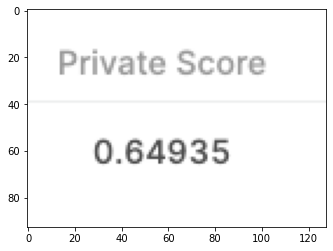

In [100]:
import matplotlib.image as mpimg

img = mpimg.imread('Score.png')

plt.imshow(img)

# **Last notes**

As seen in the multivariate analysis by observing the coeficients of the logistic regression, no feature has a big effect in the defaulting of the loans. 

The characteristics of the users defaulting and not defaulting is extremely similar, which makes the prediction very hard. 

Moreover, having a very imbalanced data doesn't make it any easier.

Nevetheless, we were able to train a model that is able to predict 72% of the times right if a user is going to default or not.

In [101]:
df_sub = pd.read_csv("submission.csv")

In [102]:
confusion_matrix(df_sub.default, y_hat_lr_3)

array([[675, 241],
       [ 41,  43]])

In [104]:
real = pd.DataFrame(df_sub.default)
preds = pd.DataFrame(res_lr.default)
real_preds = real.merge(preds, left_index=True, right_index=True)
#coef_cols.coef = coef_cols.coef * 100
real_preds

,default_x,default_y
0,0,0
1,0,0
2,0,0
3,1,1
4,0,1
...,...,...
995,0,0
996,0,1
997,0,0
998,0,0


In [105]:
real_preds.default_x.value_counts()

0    916
1     84
Name: default_x, dtype: int64

In [106]:
real_preds.default_y.value_counts()

0    716
1    284
Name: default_y, dtype: int64

Our model predicted correctly 718 out of 1000.

It predicted that 241 were going to default but did not actually default. (False negative)

It also predicted that 41 were not going to default, but actually defaulted. (False positive)

Overall, what we were more interested in were the predictions of defaulting. The model predicted that 284 were going to default but the final data had only 84 defaults.

As a bank, we seek to minimize the number of false positives (users that will default but we predicted that they won't) while also kepping the false negatives low, since our profit comes from giving loans. Having a high number of false negatives means that we won't give loans to users which will actually be able to fulfill all payments of the loan.